# Autoencoders

In [1]:
# Required Modules

import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Applying some transformations like normalization.

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

In [3]:
# Downloading the training and testing datasets

train = datasets.MNIST('./data', download=True, train=True, transform=transform)
test = datasets.MNIST('./data', download=True, train=False, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [11]:
# Converting the downloaded datasets into iterators

trainloader = torch.utils.data.DataLoader(train, shuffle=True)
testloader = torch.utils.data.DataLoader(test, shuffle=True)

In [33]:
# Defining the autoencoder as a class

class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 16),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            nn.ReLU(True)
        )
        
    def forward(self, x):
        x = x.view((1, 784))
        x = self.encoder(x)
        x = self.decoder(x)
        
        return x
    
model = autoencoder()
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=16, bias=True)
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): ReLU(inplace=True)
  )
)


In [34]:
# Defining optimizer and loss function

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

In [36]:
epochs = 10
training_loss, testing_loss = [], []

for e in range(epochs):
    running_loss = 0
    for image, _ in trainloader:
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, image.view((1, 784)))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    test_loss = 0
    accuracy = 0
    for image, _ in testloader:
        output = model.forward(image)
        test_loss += criterion(output, image.view((1, 784)))
    
    training_loss.append(running_loss/len(trainloader))
    testing_loss.append(test_loss/len(testloader))
    
    print("Epochs {}/{} Training loss: {:6f}.. Testing loss: {:6f}".format(e+1, epochs, training_loss[e], testing_loss[e]))

KeyboardInterrupt: 

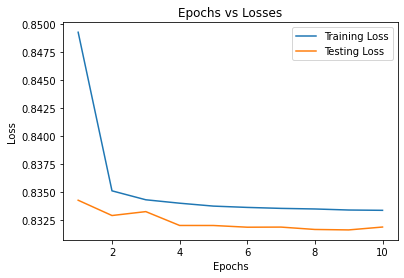

In [8]:
# Plotting Training vs Testing loss values

x_axis = range(1, epochs+1)

_, ax = plt.subplots()
ax.plot(x_axis, training_loss, label="Training Loss")
ax.plot(x_axis, testing_loss, label="Testing Loss")

ax.set_title("Epochs vs Losses")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()